In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os

In [3]:
from jupyterworkflow.data import get_fremont_data

In [4]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [5]:
data = get_fremont_data()

In [6]:
data.head()

,West,East,Total
Date,,,
2012-10-03 12:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


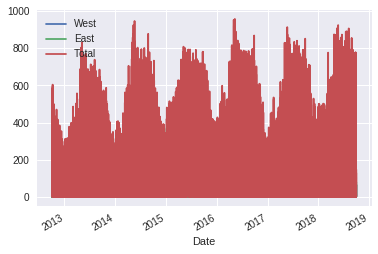

In [7]:
data.plot()

In [8]:
?data.resample

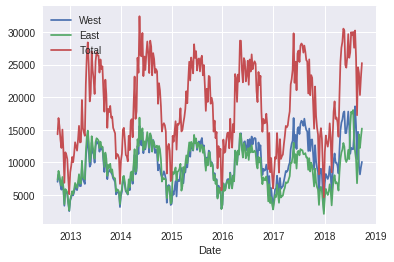

In [9]:
data.resample('W').sum().plot()

(0, 1080850.45)

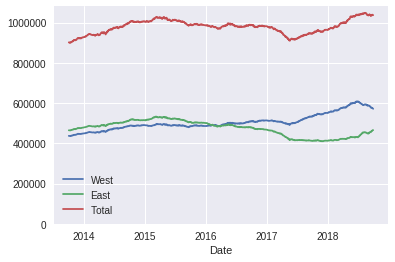

In [10]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

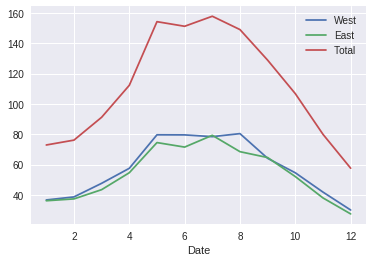

In [11]:
data.groupby(data.index.month).mean().plot()

In [12]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:24,:10]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12
01:00:00,50.0,64.5,60.0,96.0,122.5,50.0,43.0,48.5,64.0,42.5
02:00:00,65.0,64.0,66.0,106.0,122.0,63.0,56.0,48.0,60.5,35.0
03:00:00,84.5,75.0,84.0,107.0,118.5,86.0,71.0,67.0,72.5,60.0
04:00:00,161.0,141.5,159.5,94.0,114.0,128.5,126.5,117.5,141.0,85.0
05:00:00,307.0,266.5,229.5,92.5,100.0,313.5,314.0,278.5,264.5,159.0
06:00:00,267.5,260.0,210.5,61.5,65.0,251.0,274.5,240.0,171.0,132.5
07:00:00,240.0,241.5,217.0,55.5,37.5,247.5,265.5,242.5,226.5,131.0
08:00:00,258.5,250.5,219.0,74.0,62.0,275.5,273.5,260.5,254.0,153.0
09:00:00,169.5,155.5,127.0,73.5,75.0,170.5,169.5,158.5,130.0,85.5
10:00:00,83.5,83.0,77.5,74.5,63.0,63.0,64.0,66.5,26.0,38.0


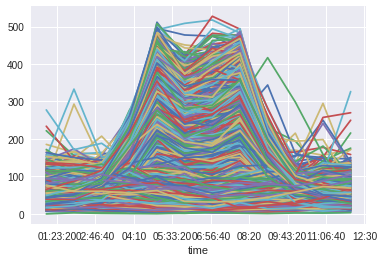

In [13]:
pivoted.plot(legend=False)

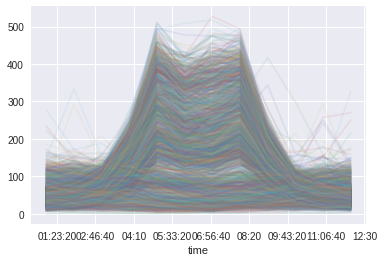

In [14]:
pivoted.plot(legend=False, alpha=0.1) # alpha => Transparency